# Churn Analysis:

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd, numpy as np

### Step1: Importing Data

In [11]:
data = pd.read_csv(r'D:\Learning & Development\IIIT-B\Group Case Study 2\telecom_churn_data.csv', encoding = 'utf-8')

In [12]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Step2: Data Analysis

In [13]:
data.shape

(99999, 226)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [15]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
90%,7.002174e+09,109.0,0.0,0.0,0.0,620.075400,617.252000,618.160400,601.537000,344.102000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2799.200000,160.372000,139.302000,112.646000,0.000000
95%,7.002291e+09,109.0,0.0,0.0,0.0,829.488200,828.357200,833.303300,805.107200,612.407500,...,0.000000,1.000000,1.000000,1.000000,1.000000,3110.000000,465.213000,450.705000,400.178000,0.500000
99%,7.002387e+09,109.0,0.0,0.0,0.0,1410.792540,1428.685880,1455.539960,1402.445660,1431.760500,...,2.000000,1.000000,1.000000,1.000000,1.000000,3651.000000,1240.063600,1278.158000,1187.785200,86.554000


In [16]:
data.circle_id.unique()

array([109], dtype=int64)

Outliers are present.

<IPython.core.display.Javascript object>


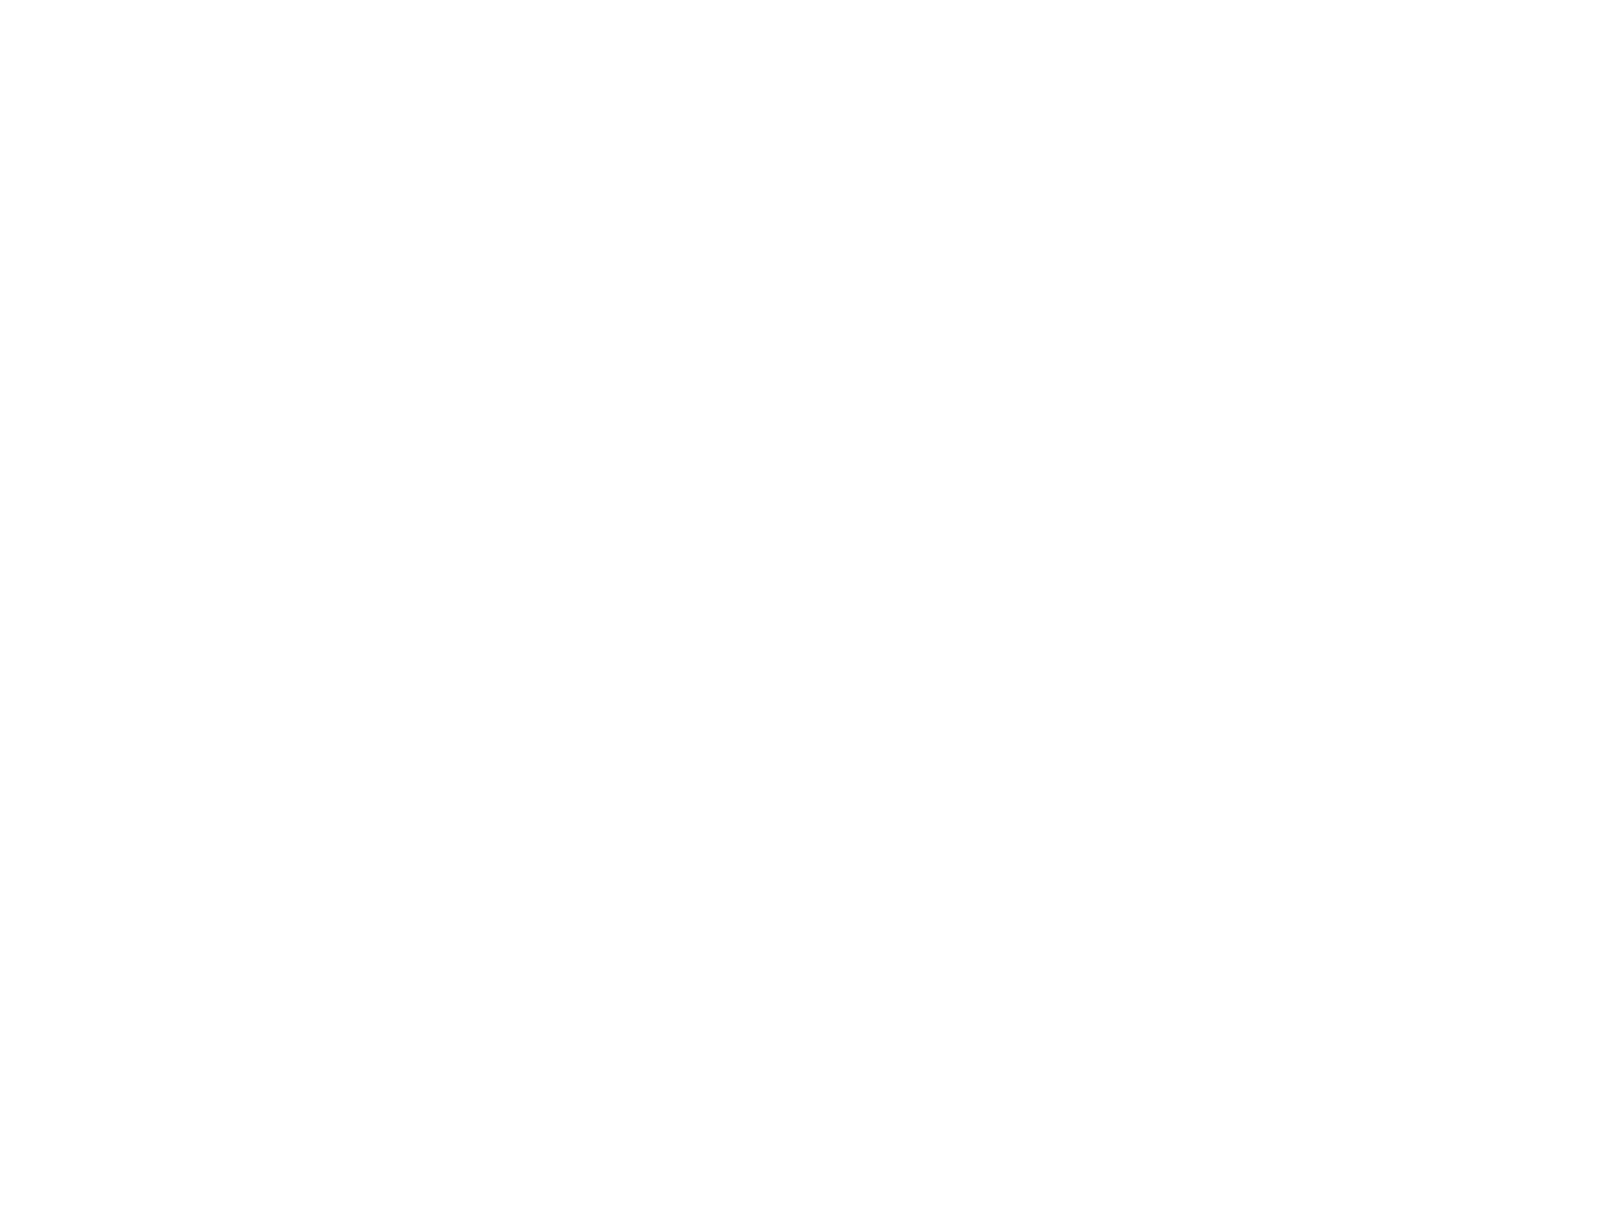

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A3182B4860>,
      dtype=object)

<IPython.core.display.Javascript object>


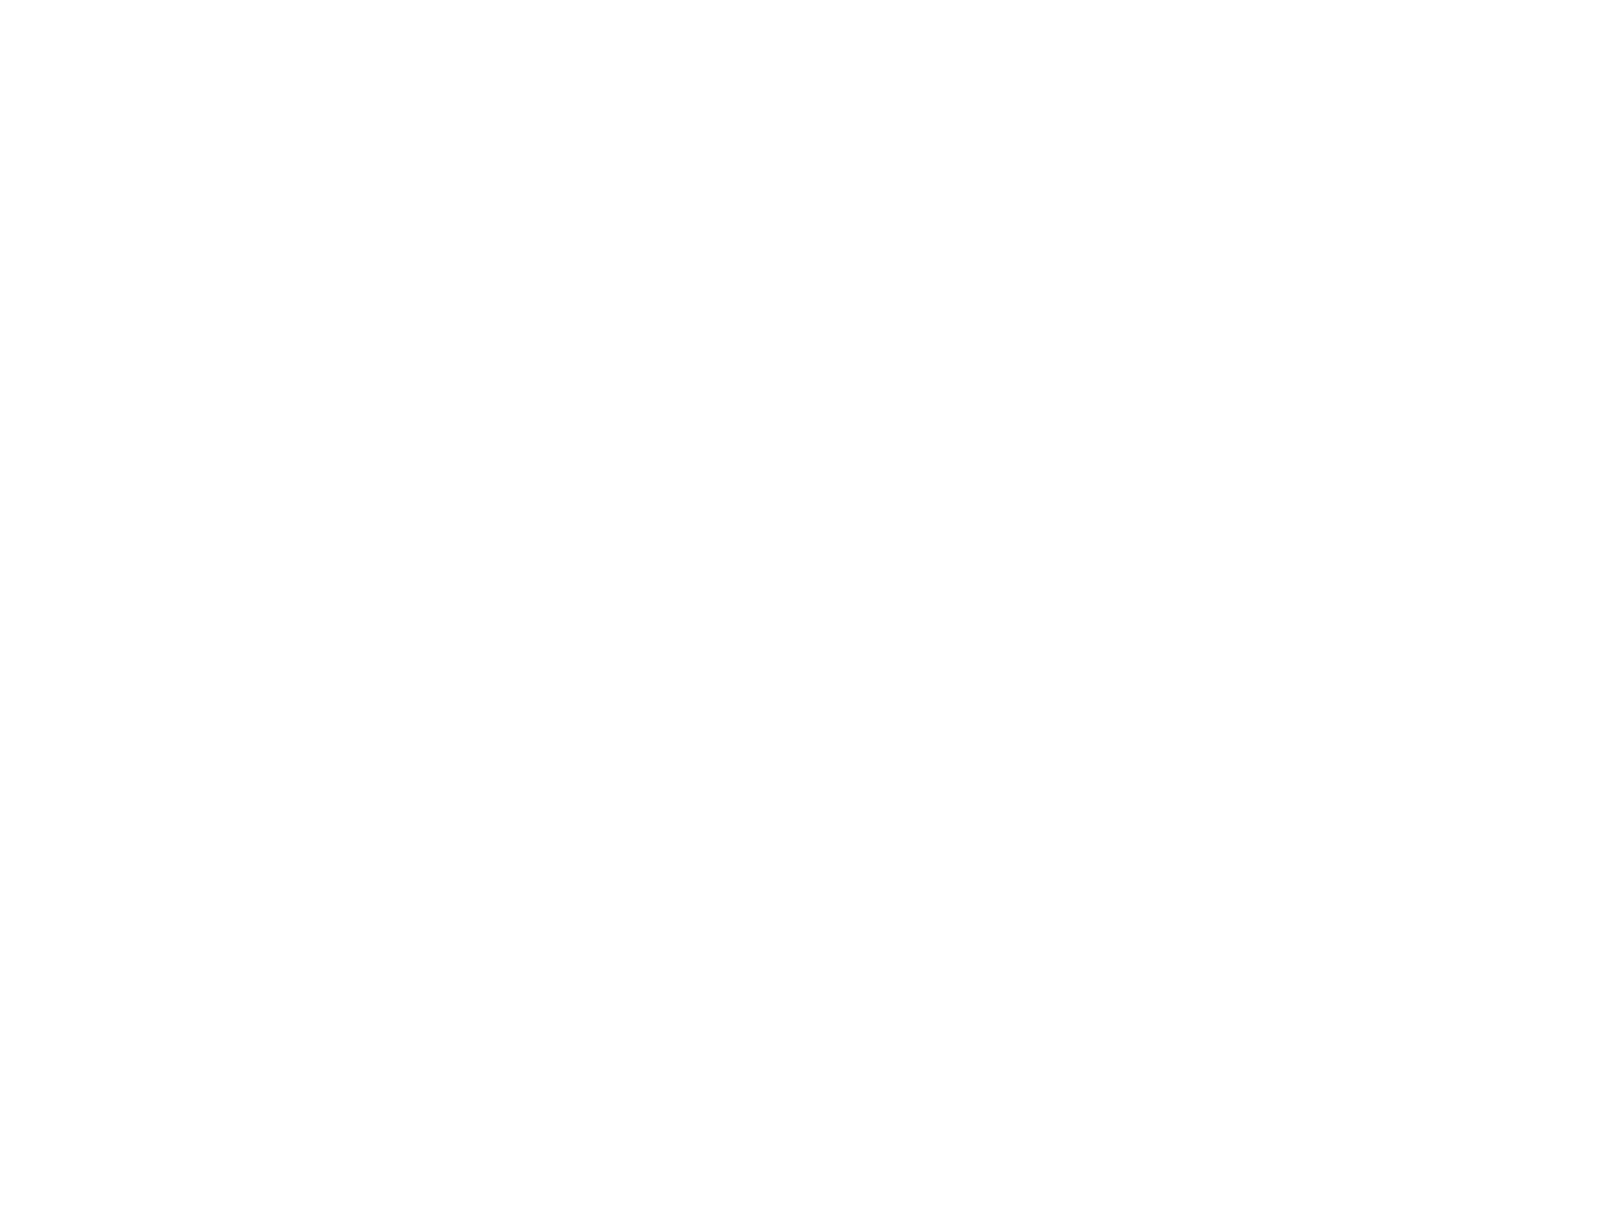

In [163]:
data.hist(bins=50, figsize=(20,15))

### Step-3: Data Preparation

In [17]:
#Removing Circle_Id, Mobile Numbers and Dates:
data = data.drop(columns = ['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7',
                           'last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6',
                           'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
                           'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                           'date_of_last_rech_data_9'], axis = 1)

##### High-Value Customers:

In [18]:
#Creating a new column that creates average of June and July data at each user level:
cols = ['total_rech_amt_6','total_rech_amt_7']
data['avg_june_july'] = data[cols].astype(float).mean(axis = 1)

In [19]:
#Now filtering data points having more than 70th percentile of the amount:
np.percentile(data['avg_june_july'], 70)

368.5

In [20]:
Valued_data = data[(data['avg_june_july'] >= 369)]

In [21]:
Valued_data.shape

(29979, 213)

In [22]:
Valued_data = Valued_data.drop(columns = 'avg_june_july', axis =1)

In [23]:
Valued_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0
8,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0
13,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,534.24,...,0,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0
16,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,70.61,...,0,NaN,NaN,NaN,NaN,511,0.00,2.45,21.89,0.0
17,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,...,0,NaN,NaN,NaN,NaN,667,0.00,0.00,0.00,0.0


#### Tagging Churners:

In [24]:
def predict(Valued_data):
    if int(Valued_data['total_ic_mou_9']) == 0 & int(Valued_data['total_og_mou_9']) == 0 & int(Valued_data['vol_2g_mb_9']) ==0 & int(Valued_data['vol_2g_mb_9']) ==0:
        return 1
    else:
        return 0
Valued_data['Prediction'] = Valued_data.apply(predict, axis =1)


In [25]:
#Check
Valued_data.loc[:,['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_2g_mb_9','Prediction']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_2g_mb_9,Prediction
7,0.00,0.00,0.0,0.0,1
8,34.91,142.18,0.0,0.0,0
13,631.86,446.09,0.0,0.0,0
16,334.56,255.74,0.0,0.0,0
17,87.13,631.08,0.0,0.0,0


#### Removing September Data:

In [26]:
cols = Valued_data.columns

In [27]:
import re
key1 = '_9'
key2 = 'sep'
Sept_data_cols = [x for x in cols if re.search(key1, x) or re.search(key2,x)]
Sept_data_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'total_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'sep_vbc_3g']

In [28]:
#Dropping all of these columns now:
final_data = Valued_data.drop(columns = Sept_data_cols, axis =1)

In [29]:
final_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Prediction
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,...,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,...,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,...,0,0,NaN,NaN,1.0,2607,0.00,0.00,0.00,0
16,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,...,0,0,NaN,NaN,NaN,511,0.00,2.45,21.89,0
17,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,...,0,0,NaN,NaN,NaN,667,0.00,0.00,0.00,0


#### Replacing Nan with IV values for those having more than 1000 nulls, rest are dropped:

In [30]:
final_data.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'Prediction'],
      dtype='object', length=161)

In [31]:
na_data = final_data.isnull().sum()

In [32]:
na_df = pd.DataFrame(na_data)

In [33]:
iv_value_cols = na_df[na_df[0]>1000].index# Only do IV value replacement for these Data Points

In [34]:
drop_na_cols = na_df[(na_df[0]>0) & (na_df[0]<1000)].index # Dropping Datapoints for these columns

In [35]:
final_data = final_data.dropna(subset = drop_na_cols)

In [36]:
final_data.shape

(28829, 161)

In [37]:
iv_df = final_data[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7',
       'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8','Prediction']]
iv_df.head()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,...,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,Prediction
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,0
13,NaN,NaN,3.0,NaN,NaN,23.0,NaN,NaN,3.0,NaN,...,NaN,NaN,0.2,NaN,NaN,0.0,NaN,NaN,1.0,0
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Calculation of IV Values:

In [38]:
#Extracting only those Values having Nulls in them:

In [39]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [40]:
for col in iv_df.columns:
    if col == 'Prediction': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(Valued_data, col, 'Prediction')
        #print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: total_rech_data_6
IV score: 0.02


WoE and IV for column: total_rech_data_7
IV score: 0.02


WoE and IV for column: total_rech_data_8
IV score: 0.07


WoE and IV for column: max_rech_data_6
IV score: 0.28


WoE and IV for column: max_rech_data_7
IV score: 0.30


WoE and IV for column: max_rech_data_8
IV score: 0.38


WoE and IV for column: count_rech_2g_6
IV score: 0.10


WoE and IV for column: count_rech_2g_7
IV score: 0.10


WoE and IV for column: count_rech_2g_8
IV score: 0.11


WoE and IV for column: count_rech_3g_6
IV score: 0.07


WoE and IV for column: count_rech_3g_7
IV score: 0.07


WoE and IV for column: count_rech_3g_8
IV score: 0.04


WoE and IV for column: av_rech_amt_data_6
IV score: 0.50


WoE and IV for column: av_rech_amt_data_7
IV score: 0.49


WoE and IV for column: av_rech_amt_data_8
IV score: 0.62


WoE and IV for column: arpu_3g_6
IV score: 0.36


WoE and IV for column: arpu_3g_7
IV score: 0.39


WoE and IV for column: arpu_3g_8
IV score: 0.

Removing columns having less than 0.12 IV

In [41]:
final_data = final_data.drop(columns = ['total_rech_data_6','total_rech_data_7','total_rech_data_8',
                                       'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8',
                                       'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8',
                                       'night_pck_user_6','night_pck_user_7','night_pck_user_8',
                                       'fb_user_6','fb_user_7','fb_user_8'], axis =1)

In [42]:
final_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Prediction
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,...,0,0,0,0,0,802,57.74,19.38,18.74,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,...,0,0,0,0,0,315,21.03,910.65,122.16,0
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,...,0,0,0,0,0,2607,0.00,0.00,0.00,0
16,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,...,0,0,0,0,0,511,0.00,2.45,21.89,0
17,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,...,0,0,0,0,0,667,0.00,0.00,0.00,0


Now Replacing Nan with IV Values for the Columns having IV > 0.12:

In [43]:
final_data['max_rech_data_6'] = final_data['max_rech_data_6'].fillna(0.28)
final_data['max_rech_data_7'] = final_data['max_rech_data_6'].fillna(0.30)
final_data['max_rech_data_8'] = final_data['max_rech_data_6'].fillna(0.38)
final_data['av_rech_amt_data_6'] = final_data['av_rech_amt_data_6'].fillna(0.50)
final_data['av_rech_amt_data_7'] = final_data['av_rech_amt_data_7'].fillna(0.49)
final_data['av_rech_amt_data_8'] = final_data['av_rech_amt_data_8'].fillna(0.62)
final_data['arpu_3g_6'] = final_data['arpu_3g_6'].fillna(0.36)
final_data['arpu_3g_7'] = final_data['arpu_3g_7'].fillna(0.39)
final_data['arpu_3g_8'] = final_data['arpu_3g_8'].fillna(0.46)
final_data['arpu_2g_6'] = final_data['arpu_2g_6'].fillna(0.51)
final_data['arpu_2g_7'] = final_data['arpu_2g_7'].fillna(0.53)
final_data['arpu_2g_8'] = final_data['arpu_2g_8'].fillna(0.53)

#### Now the Data has no Null Values.

#### Data Visualization:

In [44]:
final_data.shape

(28829, 146)

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Prediction", data=final_data, palette="bwr")
plt.show()

<Figure size 640x480 with 1 Axes>

In [46]:
churn = final_data[final_data.iloc[:,145] == 1]
non_churn = final_data[final_data.iloc[:,145] == 0]
def churn_data(final_data):
    churn_per = (int(churn.shape[0])/int(final_data.shape[0]))*100
    return churn_per
churn_percentage = churn_data(final_data)
print("Churn Percentage: {}%".format(round(churn_percentage,2)))
nonchurn_percentage = 100-churn_percentage
print("Non Churn Percentage: {}%".format(round((nonchurn_percentage),2)))

Churn Percentage: 7.39%
Non Churn Percentage: 92.61%


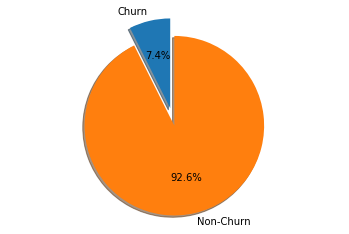

In [47]:
labels = ['Churn','Non-Churn']
sizes = [churn_percentage, nonchurn_percentage]
explode = (0.2, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  #Should be a Circle
plt.show()

### Step4: Data Modelling Phase

In [48]:
# Putting feature variable to X
X = final_data.drop(['Prediction'], axis=1)

X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,...,0,0,0,0,0,0,802,57.74,19.38,18.74
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,...,0,0,0,0,0,0,315,21.03,910.65,122.16
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,...,0,0,0,0,0,0,2607,0.00,0.00,0.00
16,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,...,0,0,0,0,0,0,511,0.00,2.45,21.89
17,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,...,0,0,0,0,0,0,667,0.00,0.00,0.00


In [49]:
# Putting response variable to y
y = final_data['Prediction']

y.head()

7     1
8     0
13    0
16    0
17    0
Name: Prediction, dtype: int64

#### Train-Test Split:

In [50]:
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Prepared Train and Test Data

#### Scaling Phase:

Due to Outliers we need to scale the data

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
X_cols = X_train.columns

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20180 entries, 14764 to 19403
Columns: 145 entries, loc_og_t2o_mou to jun_vbc_3g
dtypes: float64(120), int64(25)
memory usage: 22.5 MB


In [54]:
scaler = MinMaxScaler()

X_train[X_cols] = scaler.fit_transform(X_train[X_cols])

X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
14764,0.0,0.0,0.0,0.098306,0.070438,0.042645,0.011439,0.012220,0.014730,0.064717,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.009901,0.035449,0.095419,0.048393
49144,0.0,0.0,0.0,0.089430,0.067799,0.031139,0.022143,0.026675,0.004760,0.027972,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.537068,0.000000,0.000000,0.000000
74714,0.0,0.0,0.0,0.094854,0.068714,0.035907,0.002672,0.000495,0.000686,0.007278,...,0.142857,0.142857,0.111111,0.0,0.0,0.0,0.199469,0.066474,0.172869,0.121037
70887,0.0,0.0,0.0,0.102268,0.070976,0.049984,0.127054,0.071117,0.060664,0.042657,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.070514,0.000000,0.000000,0.000000
30189,0.0,0.0,0.0,0.094716,0.062619,0.046399,0.011666,0.008621,0.007976,0.073425,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.606375,0.000000,0.000000,0.000000


In [55]:
X_train.shape

(20180, 145)

In [56]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
X_train.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,20180.0,20180.0,20180.0,20180.000000,20180.000000,20180.000000,20180.000000,20180.000000,20180.000000,20180.000000,...,20180.000000,20180.000000,20180.000000,20180.000000,20180.000000,20180.000000,20180.000000,20180.000000,20180.000000,20180.000000
mean,0.0,0.0,0.0,0.094821,0.070194,0.043282,0.040231,0.037849,0.025661,0.050287,...,0.012031,0.013093,0.019183,0.004726,0.004957,0.003619,0.268259,0.010210,0.017117,0.015951
std,0.0,0.0,0.0,0.014445,0.012722,0.014379,0.062332,0.059067,0.044095,0.056059,...,0.040435,0.043896,0.064179,0.030554,0.031615,0.024555,0.237274,0.030971,0.051618,0.051667
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.087533,0.064141,0.036227,0.005885,0.005440,0.003037,0.016941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073835,0.000000,0.000000,0.000000
50%,0.0,0.0,0.0,0.091759,0.067567,0.040772,0.017410,0.015960,0.009904,0.034166,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184979,0.000000,0.000000,0.000000
75%,0.0,0.0,0.0,0.098624,0.073059,0.047069,0.048145,0.045227,0.028906,0.062793,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.437092,0.000450,0.000351,0.000000
90%,0.0,0.0,0.0,0.108112,0.081114,0.056043,0.107196,0.100931,0.068221,0.109040,...,0.071429,0.071429,0.111111,0.000000,0.000000,0.000000,0.650326,0.034383,0.056961,0.051220
95%,0.0,0.0,0.0,0.116347,0.088311,0.064157,0.155229,0.147471,0.103910,0.151608,...,0.071429,0.071429,0.111111,0.034483,0.032258,0.024390,0.728568,0.063668,0.106469,0.099241
99%,0.0,0.0,0.0,0.138655,0.107751,0.084962,0.291376,0.275289,0.208131,0.274828,...,0.214286,0.214286,0.333333,0.103448,0.129032,0.097561,0.838203,0.144292,0.247641,0.246867


No Outliers.

### Dimensionality Reduction Phase:

In [57]:
#For RFE we need Sklearn:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [58]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 126),
 ('std_og_t2o_mou', False, 125),
 ('loc_ic_t2o_mou', False, 124),
 ('arpu_6', False, 82),
 ('arpu_7', False, 50),
 ('arpu_8', False, 18),
 ('onnet_mou_6', False, 11),
 ('onnet_mou_7', False, 24),
 ('onnet_mou_8', False, 4),
 ('offnet_mou_6', False, 80),
 ('offnet_mou_7', False, 10),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 22),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 44),
 ('roam_og_mou_6', False, 55),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 8),
 ('loc_og_t2t_mou_6', False, 62),
 ('loc_og_t2t_mou_7', False, 88),
 ('loc_og_t2t_mou_8', False, 83),
 ('loc_og_t2m_mou_6', False, 36),
 ('loc_og_t2m_mou_7', False, 75),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 101),
 ('loc_og_t2f_mou_7', False, 52),
 ('loc_og_t2f_mou_8', False, 7),
 ('loc_og_t2c_mou_6', False, 49),
 ('loc_og_t2c_mou_7', False, 72),
 ('loc_og_t2c_mou_8', False, 91),
 ('loc_og_mou_6', False, 116),
 ('loc_og_mou_7', False, 106),
 ('loc

In [60]:
reduced_cols = X_train.columns[rfe.support_]

#### Significance and Multi-collinearity Test:

In [61]:
import statsmodels.api as sm

In [62]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train[reduced_cols])
res = sm.GLM(y_train,(X_train_sm), family = sm.families.Binomial())
res = res.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prediction   No. Observations:                20180
Model:                            GLM   Df Residuals:                    20159
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3984.9
Date:                Mon, 14 Oct 2019   Deviance:                       7969.8
Time:                        22:43:11   Pearson chi2:                 1.78e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1901      0.067    -17.770      0.000      -1.321      -1.059
offnet_mou_8           2.8426      4.657      0.610      0.542      -6.286      11.971
roam_ic_mou_7          4.5519      1.407      3.236      0.001       1.795       7.309
roam_og_mou_7          4.1113      0.551      7.459      0.000       3.031       5.192
loc_og_t2m_mou_8      -9.1684      2.871     -3.193      0.001     -14.796      -3.541
loc_og_mou_8          -3.8911      7.630     -0.510      0.610     -18.846      11.064
std_og_t2t_mou_8       0.3452      2.998      0.115      0.908      -5.531       6.222
std_og_mou_6           2.0734      0.501      4.139      0.000       1.092       3.055
std_og_mou_7          -5.3375      2.009     -2.657      0.008      -9.275      -1.400
std_og_mou_8          -4.5045      8.645     -0.521      0.602     -21.449      12.440
total_og_mou_7        13.4387      1.848      7.273      0.000       9.817      17.060
total_og_mou_8       -14.4088      9.465     -1.522      0.128     -32.959       4.142
loc_ic_t2m_mou_8      -5.8819      6.634     -0.887      0.375     -18.883       7.120
loc_ic_mou_8         -18.9027      5.236     -3.610      0.000     -29.166      -8.639
total_ic_mou_8        -7.7923      2.395     -3.254      0.001     -12.486      -3.099
spl_ic_mou_8          -5.8082      0.862     -6.737      0.000      -7.498      -4.118
total_rech_num_8      -6.1354      1.002     -6.123      0.000      -8.099      -4.172
last_day_rch_amt_8   -13.0934      1.814     -7.219      0.000     -16.648      -9.539
av_rech_amt_data_8    -4.5382      0.713     -6.361      0.000      -5.936      -3.140
vol_3g_mb_7            5.9334      0.927      6.403      0.000       4.117       7.750
monthly_2g_8          -3.2450      0.635     -5.113      0.000      -4.489      -2.001
======================================================================================
"""

#### Checking Multicollinearity using VIF

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[reduced_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[reduced_cols].values, i) for i in range(X_train[reduced_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,total_og_mou_8,647.50
8,std_og_mou_8,301.06
4,loc_og_mou_8,155.02
0,offnet_mou_8,86.82
5,std_og_t2t_mou_8,51.71
3,loc_og_t2m_mou_8,24.14
9,total_og_mou_7,21.54
7,std_og_mou_7,19.69
12,loc_ic_mou_8,12.24
13,total_ic_mou_8,8.00


Removing "std_og_t2t_mou_8"

In [65]:
reduced_cols = reduced_cols.drop('std_og_t2t_mou_8', 1)
reduced_cols

Index(['offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'av_rech_amt_data_8', 'vol_3g_mb_7',
       'monthly_2g_8'],
      dtype='object')

In [66]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[reduced_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prediction   No. Observations:                20180
Model:                            GLM   Df Residuals:                    20160
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3984.9
Date:                Mon, 14 Oct 2019   Deviance:                       7969.8
Time:                        22:43:12   Pearson chi2:                 1.78e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1907      0.067    -17.839      0.000      -1.322      -1.060
offnet_mou_8           2.3531      1.909      1.233      0.218      -1.388       6.094
roam_ic_mou_7          4.5588      1.405      3.244      0.001       1.805       7.313
roam_og_mou_7          4.1381      0.500      8.282      0.000       3.159       5.117
loc_og_t2m_mou_8      -8.9915      2.426     -3.706      0.000     -13.747      -4.236
loc_og_mou_8          -4.2692      6.894     -0.619      0.536     -17.780       9.242
std_og_mou_6           2.0718      0.501      4.138      0.000       1.090       3.053
std_og_mou_7          -5.3429      2.008     -2.660      0.008      -9.279      -1.406
std_og_mou_8          -4.4285      8.626     -0.513      0.608     -21.334      12.477
total_og_mou_7        13.4548      1.843      7.301      0.000       9.843      17.067
total_og_mou_8       -13.9592      8.629     -1.618      0.106     -30.872       2.954
loc_ic_t2m_mou_8      -5.9060      6.630     -0.891      0.373     -18.901       7.088
loc_ic_mou_8         -18.8886      5.235     -3.608      0.000     -29.149      -8.628
total_ic_mou_8        -7.7996      2.394     -3.258      0.001     -12.492      -3.107
spl_ic_mou_8          -5.8112      0.862     -6.743      0.000      -7.500      -4.122
total_rech_num_8      -6.1181      0.990     -6.179      0.000      -8.059      -4.177
last_day_rch_amt_8   -13.0591      1.789     -7.302      0.000     -16.565      -9.554
av_rech_amt_data_8    -4.5367      0.713     -6.360      0.000      -5.935      -3.139
vol_3g_mb_7            5.9316      0.927      6.402      0.000       4.116       7.748
monthly_2g_8          -3.2447      0.635     -5.113      0.000      -4.488      -2.001
======================================================================================
"""

In [67]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[reduced_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[reduced_cols].values, i) for i in range(X_train[reduced_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
9,total_og_mou_8,506.53
7,std_og_mou_8,298.12
4,loc_og_mou_8,120.49
8,total_og_mou_7,21.46
6,std_og_mou_7,19.69


Removing "std_og_mou_8"

In [68]:
reduced_cols = reduced_cols.drop('std_og_mou_8', 1)
reduced_cols

Index(['offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'av_rech_amt_data_8', 'vol_3g_mb_7', 'monthly_2g_8'],
      dtype='object')

In [69]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[reduced_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prediction   No. Observations:                20180
Model:                            GLM   Df Residuals:                    20161
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3985.0
Date:                Mon, 14 Oct 2019   Deviance:                       7970.0
Time:                        22:43:13   Pearson chi2:                 1.78e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1914      0.067    -17.856      0.000      -1.322      -1.061
offnet_mou_8           2.4208      1.902      1.273      0.203      -1.308       6.149
roam_ic_mou_7          4.5546      1.405      3.243      0.001       1.802       7.308
roam_og_mou_7          4.1314      0.499      8.275      0.000       3.153       5.110
loc_og_t2m_mou_8      -9.0086      2.427     -3.712      0.000     -13.765      -4.252
loc_og_mou_8          -1.1129      3.438     -0.324      0.746      -7.852       5.626
std_og_mou_6           2.0744      0.501      4.143      0.000       1.093       3.056
std_og_mou_7          -5.6003      1.947     -2.876      0.004      -9.417      -1.783
total_og_mou_7        13.6820      1.791      7.638      0.000      10.171      17.193
total_og_mou_8       -18.3250      1.647    -11.126      0.000     -21.553     -15.097
loc_ic_t2m_mou_8      -5.9290      6.630     -0.894      0.371     -18.924       7.066
loc_ic_mou_8         -18.9717      5.229     -3.628      0.000     -29.220      -8.724
total_ic_mou_8        -7.7124      2.380     -3.241      0.001     -12.376      -3.048
spl_ic_mou_8          -5.8098      0.862     -6.741      0.000      -7.499      -4.121
total_rech_num_8      -6.1020      0.990     -6.164      0.000      -8.042      -4.162
last_day_rch_amt_8   -13.0493      1.789     -7.295      0.000     -16.555      -9.543
av_rech_amt_data_8    -4.5363      0.713     -6.360      0.000      -5.934      -3.138
vol_3g_mb_7            5.9326      0.926      6.405      0.000       4.117       7.748
monthly_2g_8          -3.2446      0.635     -5.113      0.000      -4.488      -2.001
======================================================================================
"""

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[reduced_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[reduced_cols].values, i) for i in range(X_train[reduced_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_og_mou_7,20.76
6,std_og_mou_7,18.99
10,loc_ic_mou_8,12.24
4,loc_og_mou_8,9.65
8,total_og_mou_8,9.08
11,total_ic_mou_8,7.99
9,loc_ic_t2m_mou_8,6.19
3,loc_og_t2m_mou_8,5.40
0,offnet_mou_8,4.50
5,std_og_mou_6,3.14


Removing "loc_og_mou_8"

In [71]:
reduced_cols = reduced_cols.drop('loc_og_mou_8', 1)
reduced_cols

Index(['offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2m_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_3g_mb_7', 'monthly_2g_8'],
      dtype='object')

In [72]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[reduced_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prediction   No. Observations:                20180
Model:                            GLM   Df Residuals:                    20162
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3985.1
Date:                Mon, 14 Oct 2019   Deviance:                       7970.1
Time:                        22:43:14   Pearson chi2:                 1.80e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1897      0.067    -17.879      0.000      -1.320      -1.059
offnet_mou_8           2.5628      1.856      1.381      0.167      -1.075       6.200
roam_ic_mou_7          4.5501      1.404      3.240      0.001       1.798       7.303
roam_og_mou_7          4.1213      0.499      8.266      0.000       3.144       5.099
loc_og_t2m_mou_8      -9.3326      2.205     -4.233      0.000     -13.654      -5.012
std_og_mou_6           2.0715      0.501      4.136      0.000       1.090       3.053
std_og_mou_7          -5.1573      1.392     -3.704      0.000      -7.886      -2.428
total_og_mou_7        13.2780      1.290     10.290      0.000      10.749      15.807
total_og_mou_8       -18.5625      1.481    -12.530      0.000     -21.466     -15.659
loc_ic_t2m_mou_8      -5.6811      6.587     -0.862      0.388     -18.591       7.229
loc_ic_mou_8         -19.1991      5.181     -3.705      0.000     -29.355      -9.044
total_ic_mou_8        -7.6828      2.376     -3.233      0.001     -12.340      -3.026
spl_ic_mou_8          -5.8097      0.862     -6.741      0.000      -7.499      -4.121
total_rech_num_8      -6.0830      0.988     -6.157      0.000      -8.019      -4.147
last_day_rch_amt_8   -13.0539      1.789     -7.297      0.000     -16.560      -9.548
av_rech_amt_data_8    -4.5450      0.713     -6.375      0.000      -5.942      -3.148
vol_3g_mb_7            5.9362      0.927      6.407      0.000       4.120       7.752
monthly_2g_8          -3.2467      0.635     -5.116      0.000      -4.490      -2.003
======================================================================================
"""

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[reduced_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[reduced_cols].values, i) for i in range(X_train[reduced_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
6,total_og_mou_7,12.77
9,loc_ic_mou_8,12.09
5,std_og_mou_7,10.92
10,total_ic_mou_8,7.98
7,total_og_mou_8,6.71


Removing "loc_ic_t2m_mou_8"

In [74]:
reduced_cols = reduced_cols.drop('loc_ic_t2m_mou_8', 1)
reduced_cols

Index(['offnet_mou_8', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2m_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'av_rech_amt_data_8', 'vol_3g_mb_7',
       'monthly_2g_8'],
      dtype='object')

In [75]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[reduced_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prediction   No. Observations:                20180
Model:                            GLM   Df Residuals:                    20163
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3985.4
Date:                Mon, 14 Oct 2019   Deviance:                       7970.8
Time:                        22:43:15   Pearson chi2:                 1.55e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1901      0.067    -17.889      0.000      -1.321      -1.060
offnet_mou_8           2.5124      1.854      1.355      0.175      -1.121       6.145
roam_ic_mou_7          4.5532      1.400      3.252      0.001       1.809       7.297
roam_og_mou_7          4.1269      0.498      8.289      0.000       3.151       5.103
loc_og_t2m_mou_8      -9.7974      2.148     -4.560      0.000     -14.008      -5.587
std_og_mou_6           2.0694      0.501      4.134      0.000       1.088       3.051
std_og_mou_7          -5.2552      1.384     -3.798      0.000      -7.967      -2.543
total_og_mou_7        13.3596      1.283     10.413      0.000      10.845      15.874
total_og_mou_8       -18.4687      1.475    -12.520      0.000     -21.360     -15.577
loc_ic_mou_8         -22.6086      3.446     -6.561      0.000     -29.362     -15.855
total_ic_mou_8        -7.6930      2.376     -3.238      0.001     -12.349      -3.037
spl_ic_mou_8          -5.8152      0.862     -6.747      0.000      -7.504      -4.126
total_rech_num_8      -6.1084      0.988     -6.185      0.000      -8.044      -4.173
last_day_rch_amt_8   -13.0189      1.788     -7.283      0.000     -16.523      -9.515
av_rech_amt_data_8    -4.5365      0.712     -6.367      0.000      -5.933      -3.140
vol_3g_mb_7            5.9197      0.926      6.392      0.000       4.105       7.735
monthly_2g_8          -3.2427      0.634     -5.111      0.000      -4.486      -1.999
======================================================================================
"""

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[reduced_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[reduced_cols].values, i) for i in range(X_train[reduced_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,total_og_mou_7,12.62
5,std_og_mou_7,10.77
8,loc_ic_mou_8,8.23
9,total_ic_mou_8,7.97
7,total_og_mou_8,6.66
0,offnet_mou_8,4.18
3,loc_og_t2m_mou_8,3.65
4,std_og_mou_6,3.14
13,av_rech_amt_data_8,2.28
11,total_rech_num_8,2.26


Removing "offnet_mou_8"

In [77]:
reduced_cols = reduced_cols.drop('offnet_mou_8', 1)
reduced_cols

Index(['roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2m_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'av_rech_amt_data_8', 'vol_3g_mb_7',
       'monthly_2g_8'],
      dtype='object')

In [78]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[reduced_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prediction   No. Observations:                20180
Model:                            GLM   Df Residuals:                    20164
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3986.3
Date:                Mon, 14 Oct 2019   Deviance:                       7972.7
Time:                        22:43:15   Pearson chi2:                 1.57e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1938      0.066    -17.963      0.000      -1.324      -1.064
roam_ic_mou_7          4.5877      1.399      3.280      0.001       1.846       7.329
roam_og_mou_7          4.2584      0.487      8.750      0.000       3.305       5.212
loc_og_t2m_mou_8      -8.9713      2.056     -4.364      0.000     -13.000      -4.942
std_og_mou_6           2.0704      0.501      4.135      0.000       1.089       3.052
std_og_mou_7          -4.8743      1.345     -3.623      0.000      -7.511      -2.237
total_og_mou_7        13.1052      1.262     10.385      0.000      10.632      15.578
total_og_mou_8       -17.6172      1.315    -13.399      0.000     -20.194     -15.040
loc_ic_mou_8         -22.8943      3.433     -6.669      0.000     -29.623     -16.166
total_ic_mou_8        -7.5302      2.363     -3.187      0.001     -12.161      -2.899
spl_ic_mou_8          -5.7708      0.860     -6.711      0.000      -7.456      -4.085
total_rech_num_8      -5.9852      0.982     -6.095      0.000      -7.910      -4.061
last_day_rch_amt_8   -12.8698      1.784     -7.212      0.000     -16.367      -9.372
av_rech_amt_data_8    -4.5252      0.712     -6.353      0.000      -5.921      -3.129
vol_3g_mb_7            5.9015      0.924      6.386      0.000       4.090       7.713
monthly_2g_8          -3.2364      0.634     -5.105      0.000      -4.479      -1.994
======================================================================================
"""

In [79]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[reduced_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[reduced_cols].values, i) for i in range(X_train[reduced_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
5,total_og_mou_7,12.19
4,std_og_mou_7,10.24
7,loc_ic_mou_8,8.20
8,total_ic_mou_8,7.95
6,total_og_mou_8,5.11


Removing "total_og_mou_7"

In [80]:
reduced_cols = reduced_cols.drop('total_og_mou_7', 1)
reduced_cols

Index(['roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2m_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'av_rech_amt_data_8', 'vol_3g_mb_7', 'monthly_2g_8'],
      dtype='object')

In [81]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[reduced_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prediction   No. Observations:                20180
Model:                            GLM   Df Residuals:                    20165
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4026.8
Date:                Mon, 14 Oct 2019   Deviance:                       8053.6
Time:                        22:43:16   Pearson chi2:                 1.21e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0480      0.065    -16.223      0.000      -1.175      -0.921
roam_ic_mou_7          4.4355      1.396      3.177      0.001       1.699       7.172
roam_og_mou_7          4.1469      0.484      8.573      0.000       3.199       5.095
loc_og_t2m_mou_8      -3.1287      1.992     -1.571      0.116      -7.033       0.776
std_og_mou_6           1.7766      0.495      3.588      0.000       0.806       2.747
std_og_mou_7           7.5771      0.757     10.004      0.000       6.093       9.062
total_og_mou_8       -16.5445      1.357    -12.193      0.000     -19.204     -13.885
loc_ic_mou_8         -20.2438      3.466     -5.840      0.000     -27.038     -13.450
total_ic_mou_8        -8.5585      2.430     -3.522      0.000     -13.322      -3.795
spl_ic_mou_8          -5.8921      0.862     -6.838      0.000      -7.581      -4.203
total_rech_num_8      -6.6985      0.989     -6.774      0.000      -8.637      -4.760
last_day_rch_amt_8   -13.5057      1.811     -7.458      0.000     -17.055      -9.957
av_rech_amt_data_8    -4.6193      0.712     -6.491      0.000      -6.014      -3.224
vol_3g_mb_7            5.8528      0.927      6.312      0.000       4.036       7.670
monthly_2g_8          -3.2944      0.632     -5.210      0.000      -4.534      -2.055
======================================================================================
"""

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[reduced_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[reduced_cols].values, i) for i in range(X_train[reduced_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
6,loc_ic_mou_8,8.09
7,total_ic_mou_8,7.95
4,std_og_mou_7,4.83
5,total_og_mou_8,4.67
3,std_og_mou_6,3.14


Removing "loc_og_t2m_mou_8"

In [83]:
reduced_cols = reduced_cols.drop('loc_og_t2m_mou_8', 1)
reduced_cols

Index(['roam_ic_mou_7', 'roam_og_mou_7', 'std_og_mou_6', 'std_og_mou_7',
       'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'av_rech_amt_data_8',
       'vol_3g_mb_7', 'monthly_2g_8'],
      dtype='object')

In [84]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[reduced_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prediction   No. Observations:                20180
Model:                            GLM   Df Residuals:                    20166
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4028.1
Date:                Mon, 14 Oct 2019   Deviance:                       8056.2
Time:                        22:43:16   Pearson chi2:                 1.20e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0634      0.064    -16.634      0.000      -1.189      -0.938
roam_ic_mou_7          4.4578      1.400      3.185      0.001       1.714       7.201
roam_og_mou_7          4.1711      0.485      8.604      0.000       3.221       5.121
std_og_mou_6           1.8311      0.495      3.695      0.000       0.860       2.802
std_og_mou_7           7.7940      0.749     10.410      0.000       6.327       9.261
total_og_mou_8       -17.1438      1.315    -13.038      0.000     -19.721     -14.567
loc_ic_mou_8         -22.2746      3.231     -6.894      0.000     -28.607     -15.942
total_ic_mou_8        -8.3213      2.413     -3.448      0.001     -13.051      -3.592
spl_ic_mou_8          -5.8752      0.862     -6.818      0.000      -7.564      -4.186
total_rech_num_8      -6.6530      0.988     -6.731      0.000      -8.590      -4.716
last_day_rch_amt_8   -13.6433      1.811     -7.534      0.000     -17.192     -10.094
av_rech_amt_data_8    -4.6216      0.712     -6.495      0.000      -6.016      -3.227
vol_3g_mb_7            5.9031      0.926      6.378      0.000       4.089       7.717
monthly_2g_8          -3.2836      0.632     -5.193      0.000      -4.523      -2.044
======================================================================================
"""

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[reduced_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[reduced_cols].values, i) for i in range(X_train[reduced_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
6,total_ic_mou_8,7.95
5,loc_ic_mou_8,7.73
3,std_og_mou_7,4.46
4,total_og_mou_8,3.78
2,std_og_mou_6,3.14


Removing "total_ic_mou_8"

In [86]:
reduced_cols = reduced_cols.drop('total_ic_mou_8', 1)
reduced_cols

Index(['roam_ic_mou_7', 'roam_og_mou_7', 'std_og_mou_6', 'std_og_mou_7',
       'total_og_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'av_rech_amt_data_8', 'vol_3g_mb_7',
       'monthly_2g_8'],
      dtype='object')

In [87]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[reduced_cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prediction   No. Observations:                20180
Model:                            GLM   Df Residuals:                    20167
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4036.4
Date:                Mon, 14 Oct 2019   Deviance:                       8072.7
Time:                        22:43:16   Pearson chi2:                 1.37e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.0799      0.064    -16.942      0.000      -1.205      -0.955
roam_ic_mou_7          4.1035      1.359      3.020      0.003       1.441       6.767
roam_og_mou_7          4.2114      0.481      8.763      0.000       3.269       5.153
std_og_mou_6           1.8427      0.494      3.733      0.000       0.875       2.810
std_og_mou_7           7.7785      0.746     10.423      0.000       6.316       9.241
total_og_mou_8       -17.6936      1.312    -13.489      0.000     -20.264     -15.123
loc_ic_mou_8         -31.1624      2.022    -15.410      0.000     -35.126     -27.199
spl_ic_mou_8          -5.9287      0.863     -6.872      0.000      -7.620      -4.238
total_rech_num_8      -6.6880      0.989     -6.764      0.000      -8.626      -4.750
last_day_rch_amt_8   -13.8500      1.808     -7.660      0.000     -17.394     -10.306
av_rech_amt_data_8    -4.7017      0.709     -6.633      0.000      -6.091      -3.312
vol_3g_mb_7            5.8831      0.922      6.383      0.000       4.077       7.689
monthly_2g_8          -3.2998      0.633     -5.216      0.000      -4.540      -2.060
======================================================================================
"""

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[reduced_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[reduced_cols].values, i) for i in range(X_train[reduced_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
3,std_og_mou_7,4.46
4,total_og_mou_8,3.77
2,std_og_mou_6,3.14
9,av_rech_amt_data_8,2.27
7,total_rech_num_8,2.25


Data Seems Fine now.

#### Predicting on Train Data:

In [89]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

14764    0.036342
49144    0.087739
74714    0.172805
70887    0.027771
30189    0.031995
6236     0.012686
14063    0.076032
58115    0.029642
5883     0.003694
225      0.005640
dtype: float64

In [90]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03634178, 0.08773936, 0.17280495, 0.02777099, 0.0319952 ,
       0.01268568, 0.07603156, 0.02964172, 0.00369365, 0.00563967])

##### Creating a dataframe with the actual Churn flag and the predicted probabilities

In [91]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustomerID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustomerID
0,0,0.036342,14764
1,0,0.087739,49144
2,0,0.172805,74714
3,0,0.027771,70887
4,0,0.031995,30189


In [92]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustomerID,predicted
0,0,0.036342,14764,0
1,0,0.087739,49144,0
2,0,0.172805,74714,0
3,0,0.027771,70887,0
4,0,0.031995,30189,0


In [93]:
from sklearn import metrics

In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18607    94]
 [ 1344   135]]


In [95]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9287413280475718


In [96]:
print(metrics.f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.15807962529274006


### Now on Test Data:

In [97]:
X_test.shape

(8649, 145)

In [98]:
#Since Number of Columns have decreased:
scaler = MinMaxScaler()
X_train[reduced_cols] = scaler.fit_transform(X_train[reduced_cols])
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
14764,0.0,0.0,0.0,0.098306,0.070438,0.042645,0.011439,0.012220,0.014730,0.064717,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.009901,0.035449,0.095419,0.048393
49144,0.0,0.0,0.0,0.089430,0.067799,0.031139,0.022143,0.026675,0.004760,0.027972,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.537068,0.000000,0.000000,0.000000
74714,0.0,0.0,0.0,0.094854,0.068714,0.035907,0.002672,0.000495,0.000686,0.007278,...,0.142857,0.142857,0.111111,0.0,0.0,0.0,0.199469,0.066474,0.172869,0.121037
70887,0.0,0.0,0.0,0.102268,0.070976,0.049984,0.127054,0.071117,0.060664,0.042657,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.070514,0.000000,0.000000,0.000000
30189,0.0,0.0,0.0,0.094716,0.062619,0.046399,0.011666,0.008621,0.007976,0.073425,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.606375,0.000000,0.000000,0.000000


In [99]:
X_test[reduced_cols] = scaler.transform(X_test[reduced_cols])

In [100]:
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
70311,0.0,0.0,0.0,941.817,926.949,981.848,135.99,135.99,166.98,532.84,...,0,0,0,0,0,0,2257,0.0,0.0,0.0
30518,0.0,0.0,0.0,458.553,252.861,217.659,308.26,281.89,199.89,63.23,...,1,0,0,0,0,0,364,0.0,0.0,0.0
91561,0.0,0.0,0.0,363.849,622.554,624.107,413.68,1042.01,1131.53,228.78,...,0,0,0,0,0,0,468,0.0,0.0,0.0
85954,0.0,0.0,0.0,308.225,484.817,507.702,276.73,349.51,327.39,32.78,...,0,0,0,0,0,0,1029,0.0,0.0,0.0
64713,0.0,0.0,0.0,510.388,543.378,559.061,1204.26,413.59,319.26,168.89,...,1,0,1,0,0,0,265,0.0,0.0,0.0


In [101]:
X_test_sm = sm.add_constant(X_test[reduced_cols])

In [102]:
y_test_pred = res.predict(X_test_sm)

In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [104]:
y_test_pred = res.predict(X_test_sm).values.reshape(-1)

In [105]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustomerID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,CustomerID
0,0,0.0,70311
1,0,0.0,30518
2,0,0.0,91561
3,0,0.0,85954
4,0,0.0,64713


In [106]:
y_test_pred_final['Churn_Prob'] = y_test_pred

In [107]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,CustomerID,predicted
0,0,0.0,70311,0
1,0,0.0,30518,0
2,0,0.0,91561,0
3,0,0.0,85954,0
4,0,0.0,64713,0


In [108]:
# Let's check the overall accuracy ON TEST DATA OF 30%.
print(metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

0.8861140016186843


In [109]:
print(metrics.f1_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

0.4222873900293255


In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

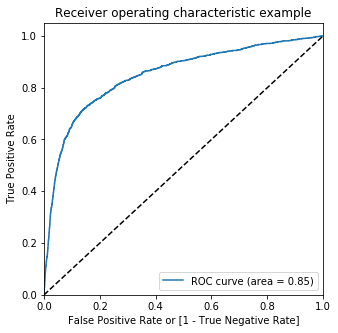

In [112]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [113]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Churn, y_test_pred_final.Churn_Prob, drop_intermediate = False )

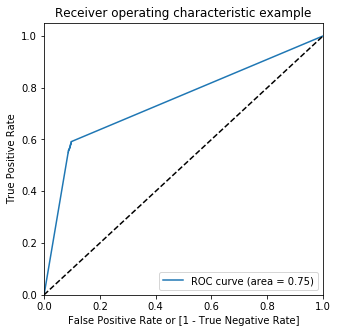

In [114]:
draw_roc(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)

### PCA on the data

In [116]:
# Putting feature variable to X
X = final_data.drop(['Prediction'], axis=1)

X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,...,0,0,0,0,0,0,802,57.74,19.38,18.74
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,...,0,0,0,0,0,0,315,21.03,910.65,122.16
13,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,...,0,0,0,0,0,0,2607,0.00,0.00,0.00
16,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,296.29,...,0,0,0,0,0,0,511,0.00,2.45,21.89
17,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,...,0,0,0,0,0,0,667,0.00,0.00,0.00


In [117]:
# Putting response variable to y
y = final_data['Prediction']

y.head()


7     1
8     0
13    0
16    0
17    0
Name: Prediction, dtype: int64

In [118]:

from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [119]:
X_train.shape

(20180, 145)

In [120]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [121]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

#### Let's plot the principal components and try to make sense of them
- We'll plot original features on the first 2 principal components as axes

In [122]:
pca.components_

array([[-6.70128493e-17, -1.11022302e-16, -0.00000000e+00, ...,
        -3.96905540e-02, -4.40365399e-02, -4.05563192e-02],
       [-7.63710550e-17, -1.11022302e-16, -1.11022302e-16, ...,
         1.73861836e-01,  1.86333978e-01,  1.70684916e-01],
       [-6.70404911e-18,  1.04083409e-16,  8.32667268e-17, ...,
        -4.65243942e-02, -5.61516435e-02, -5.19173592e-02],
       ...,
       [ 0.00000000e+00, -8.89618261e-03, -4.84093018e-02, ...,
        -1.73472348e-18,  9.54097912e-18, -3.46944695e-18],
       [-1.00000000e+00, -1.11242803e-23, -2.24967627e-24, ...,
        -1.83405031e-16, -2.99103021e-16,  3.25840515e-16],
       [ 0.00000000e+00,  1.84949023e-02, -1.49626219e-02, ...,
        -2.51534904e-17, -8.67361738e-18,  2.34187669e-17]])

In [123]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-6.701285e-17,-7.637106e-17,loc_og_t2o_mou
1,-1.110223e-16,-1.110223e-16,std_og_t2o_mou
2,-0.000000e+00,-1.110223e-16,loc_ic_t2o_mou
3,1.097014e-01,1.438809e-01,arpu_6
4,1.367300e-01,1.696288e-01,arpu_7


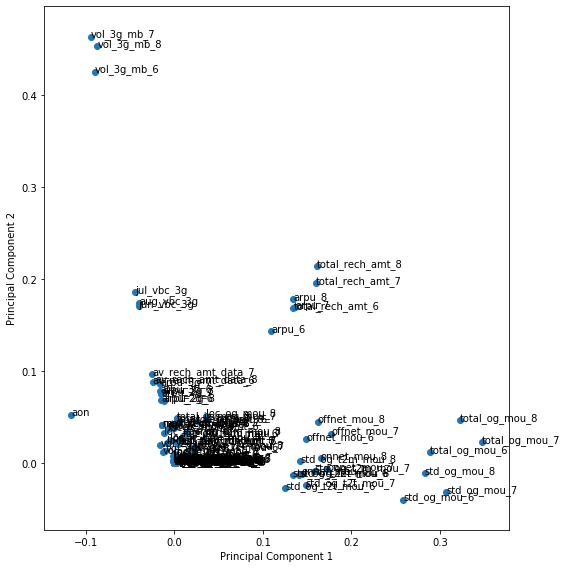

In [124]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [125]:
pca.explained_variance_ratio_

array([2.48995349e-01, 1.69082729e-01, 1.08371792e-01, 7.19061812e-02,
       6.17819358e-02, 5.40886814e-02, 4.91202836e-02, 3.26708292e-02,
       2.42202167e-02, 2.24898152e-02, 1.57438754e-02, 1.46146255e-02,
       1.29938620e-02, 1.25996262e-02, 1.03808814e-02, 7.79134271e-03,
       7.54975869e-03, 6.18585772e-03, 5.90601991e-03, 4.84538959e-03,
       4.71939015e-03, 4.27622172e-03, 4.14359790e-03, 3.66017561e-03,
       3.46832577e-03, 3.03029420e-03, 2.90234893e-03, 2.78920154e-03,
       2.55631400e-03, 2.22912051e-03, 2.05323913e-03, 1.77064866e-03,
       1.65450482e-03, 1.59722795e-03, 1.30211786e-03, 1.22378124e-03,
       1.13844128e-03, 1.00002404e-03, 8.95773203e-04, 8.51529821e-04,
       8.02590638e-04, 7.75776614e-04, 7.40514391e-04, 6.94881451e-04,
       6.65045066e-04, 6.27349985e-04, 5.94089160e-04, 5.82444578e-04,
       5.34092663e-04, 5.07509404e-04, 4.75338083e-04, 4.28258383e-04,
       4.03822697e-04, 3.90558943e-04, 3.60023134e-04, 2.44046766e-04,
      

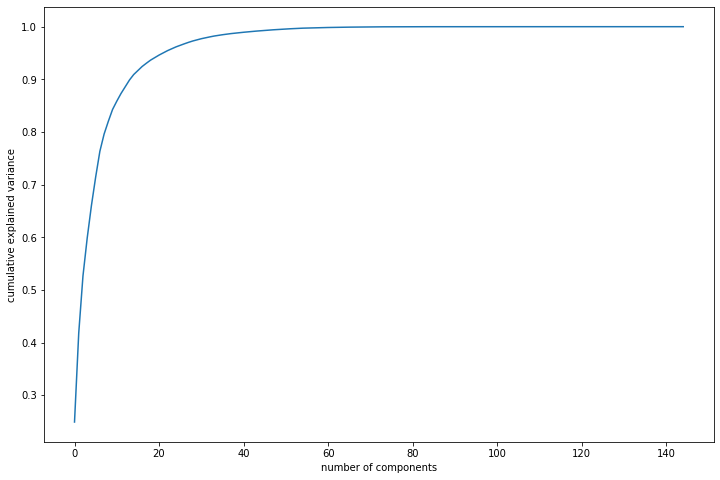

In [126]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [127]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)

In [128]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(20180, 20)

In [129]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

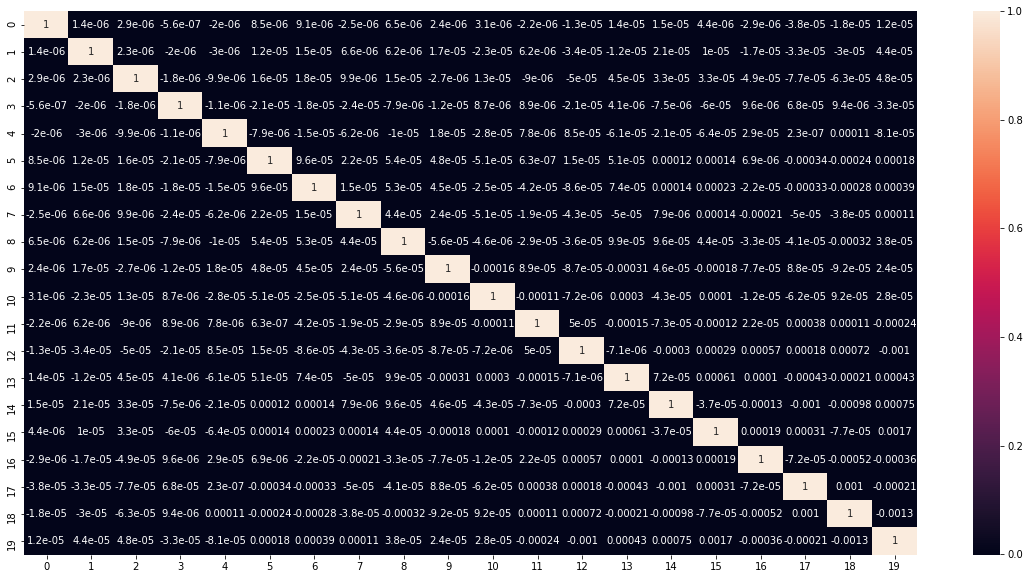

In [130]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [131]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0017211916981461413 , min corr:  -0.0013049585982474296


In [132]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8649, 20)

In [133]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [134]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.82'

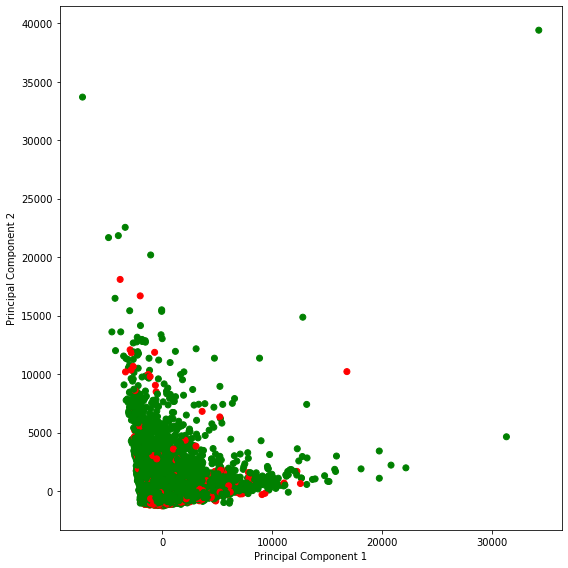

In [135]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

#### So there it is - a very similar result, without all the hassles

# Model Building using - DECISION TREE

In [138]:
# Putting feature variable to X
X = final_data.drop(['Prediction'], axis=1)

X.head()

# Putting response variable to y
y = final_data['Prediction']

y.head()

from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [139]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [140]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      7997
           1       0.62      0.41      0.50       652

    accuracy                           0.94      8649
   macro avg       0.79      0.70      0.73      8649
weighted avg       0.93      0.94      0.93      8649



In [142]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7834  163]
 [ 383  269]]
0.9368713146028442


In [144]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(final_data.columns[1:])
features

['std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6'

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Hyperparameter Tuning

In [157]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

In [158]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.156580,0.031023,0.005984,0.000631,1,{'max_depth': 1},0.929898,0.932607,0.929138,0.936819,0.937051,0.933102,0.003336,4
1,0.268476,0.031300,0.006581,0.001735,2,{'max_depth': 2},0.937577,0.932854,0.931120,0.936819,0.936307,0.934936,0.002502,2
2,0.371605,0.017015,0.005985,0.000893,3,{'max_depth': 3},0.935100,0.933845,0.931120,0.938305,0.937794,0.935233,0.002640,1
3,0.491503,0.057507,0.006173,0.000741,4,{'max_depth': 4},0.935843,0.932607,0.931368,0.937314,0.936059,0.934638,0.002256,3
4,0.593357,0.033638,0.007379,0.001740,5,{'max_depth': 5},0.932623,0.924430,0.927403,0.935332,0.933829,0.930723,0.004126,6


In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

In [ ]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


## Grid Search to Find Optimal Hyperparameters

In [147]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [148]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.793681,0.037392,0.005992,0.000013,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.936339,0.930377,0.932607,0.935332,0.939777,0.934886,0.003217,3
1,0.779715,0.011005,0.006982,0.001997,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.936339,0.930377,0.932607,0.935332,0.939777,0.934886,0.003217,3
2,0.897601,0.044325,0.010364,0.004446,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.936587,0.931368,0.931615,0.936571,0.941760,0.935580,0.003838,1
3,0.815819,0.026620,0.006389,0.001487,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.936587,0.931368,0.931615,0.936571,0.941760,0.935580,0.003838,1
4,1.302317,0.040000,0.006582,0.000489,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.937825,0.925421,0.933598,0.927651,0.936555,0.932210,0.004883,14
5,1.342210,0.053565,0.006987,0.001557,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.937825,0.924926,0.933598,0.928890,0.936555,0.932359,0.004823,13
6,1.206373,0.041976,0.006789,0.001709,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.935348,0.928890,0.931368,0.936323,0.939033,0.934192,0.003617,5
7,1.223719,0.044240,0.005778,0.000412,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.935348,0.928890,0.931368,0.936323,0.939033,0.934192,0.003617,5
8,0.556709,0.002898,0.005588,0.000476,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.932871,0.926908,0.928642,0.936323,0.936059,0.932161,0.003821,16
9,0.589025,0.021947,0.006391,0.000803,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.932871,0.926908,0.928642,0.936571,0.936059,0.932210,0.003876,14


In [149]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9355797819623389
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [151]:
# model with optimal hyperparameters
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  min_impurity_decrease=0.0,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [152]:
# accuracy score
clf_entropy.score(X_test,y_test)

0.9388368597525726

In [ ]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(clf_entropy, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [155]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_entropy.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7997
           1       0.71      0.32      0.44       652

    accuracy                           0.94      8649
   macro avg       0.83      0.65      0.70      8649
weighted avg       0.93      0.94      0.93      8649



In [156]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[7914   83]
 [ 446  206]]


## Strategy:

- 